In [1]:
from matplotlib import pyplot as plt

from loki.libloki.configs import PulsarSearchConfig
from loki.search import ffa_search
from pyloki.config import ParamLimits
from pyloki.simulation.pulse import PulseSignalConfig

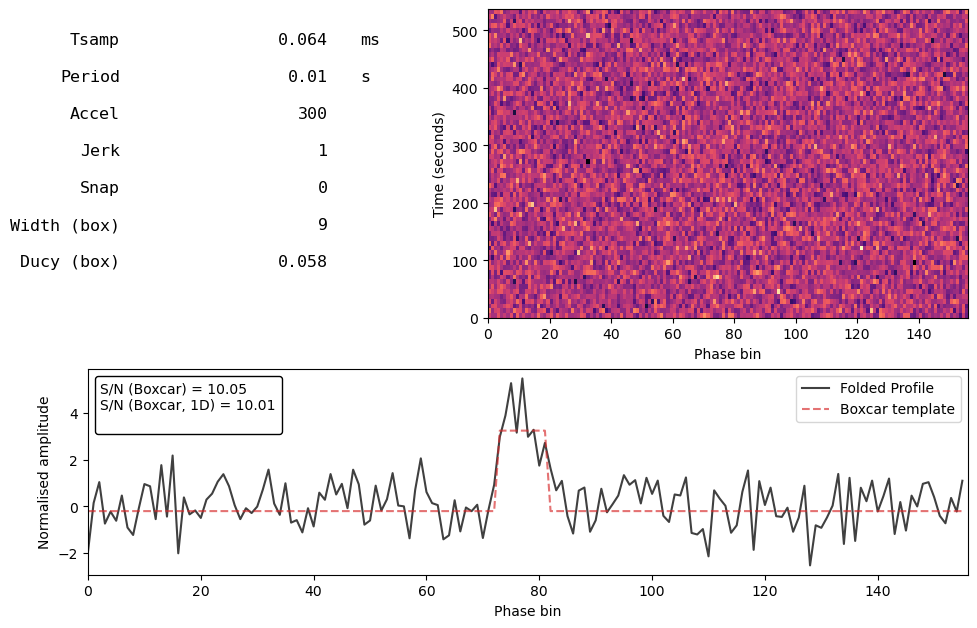

In [2]:
pulsar_period = 0.010
dt = 64e-6
accel = 300
jerk = 1
nsamps = 2**23
mod_kwargs = {"acc": accel, "jerk": jerk}
cfg = PulseSignalConfig(
    period=pulsar_period,
    dt=dt,
    nsamps=nsamps,
    snr=10,
    ducy=0.1,
    mod_kwargs=mod_kwargs,
)
tim_data = cfg.generate(shape="gaussian")
tim_data.plot_fold(cfg.freq, cfg.fold_bins, mod_kwargs=mod_kwargs)
plt.show()

In [3]:
eta = 2
nbins = 64
p = ParamLimits.from_upper([jerk, accel, cfg.freq], (-1.5, 1.5), cfg.tobs)
print(f"Param limits: {p.limits}")
bseg_brute = cfg.nsamps // 128
search_cfg = PulsarSearchConfig(
    nsamps=cfg.nsamps,
    tsamp=cfg.dt,
    nbins=nbins,
    eta=eta,
    param_limits=p.limits,
    bseg_brute=bseg_brute,
    ducy_max=0.2,
    wtsp=1.5,
    nthreads=8,
    use_fourier=False,
)
ffa_plan, pgram = ffa_search(tim_data, search_cfg, quiet=False, show_progress=False)

Param limits: [[  -1.5         1.5     ]
 [-102.653184  702.653184]
 [  99.955111  100.044889]]
[2026-02-18 18:32:12.900] [info] P-FFA [128, 1, 1, 6, 2, 64] -> [1, 25, 154, 771, 2, 64]
[2026-02-18 18:32:12.900] [info] FFA Memory Usage: 2.83 GB + 0.04 GB (coords)


In [4]:
true_values = {
    "jerk": cfg.mod_kwargs["jerk"],
    "accel": cfg.mod_kwargs["acc"],
    "freq": cfg.freq,
}
print(pgram.get_indices_summary(true_values=true_values))
print(pgram.get_summary())

True param indices: (21, 76, 385)
Best param indices: (np.int64(24), np.int64(75), np.int64(389), np.int64(5))
Best S/N: 7.72
Best Period: 0.00999995348311937
Best jerk: 1.3846153846153848
Best accel: 292.20671256774193
Best freq: 100.00046517097013
Best width: 9


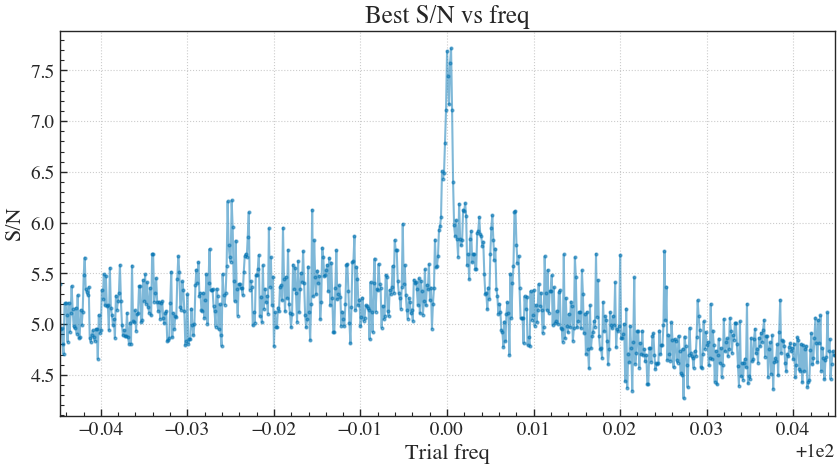

In [5]:
fig = pgram.plot_1d("freq", figsize=(10, 5))
plt.show()

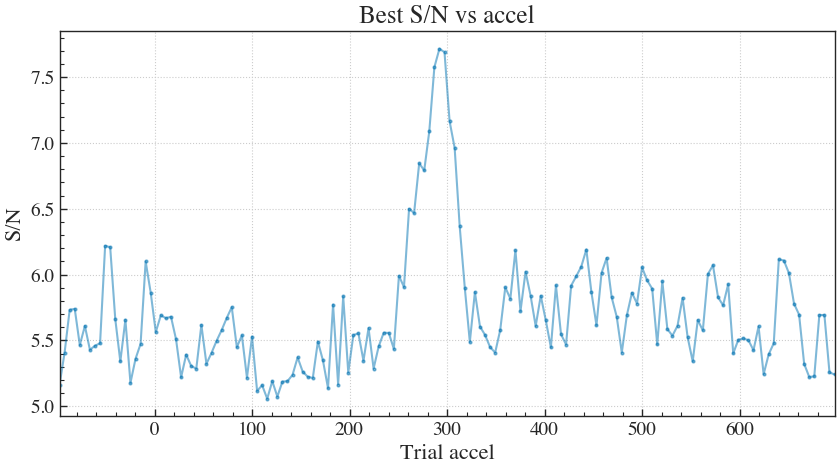

In [6]:
fig = pgram.plot_1d("accel", figsize=(10, 5))
plt.show()

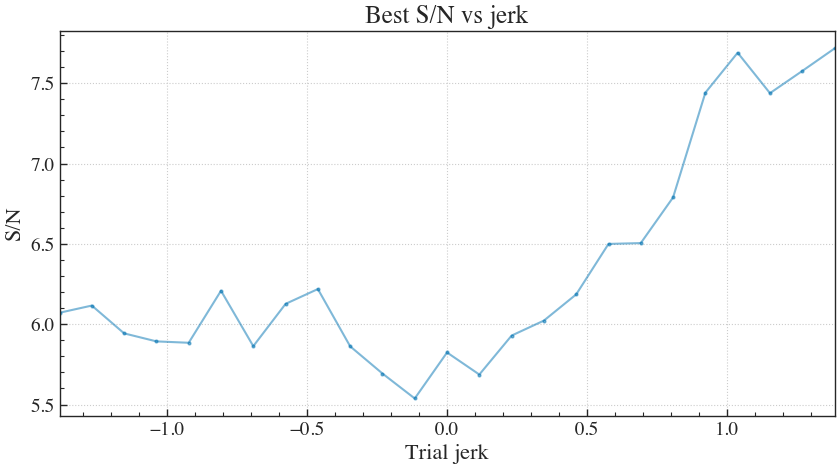

In [7]:
fig = pgram.plot_1d("jerk", figsize=(10, 5))
plt.show()

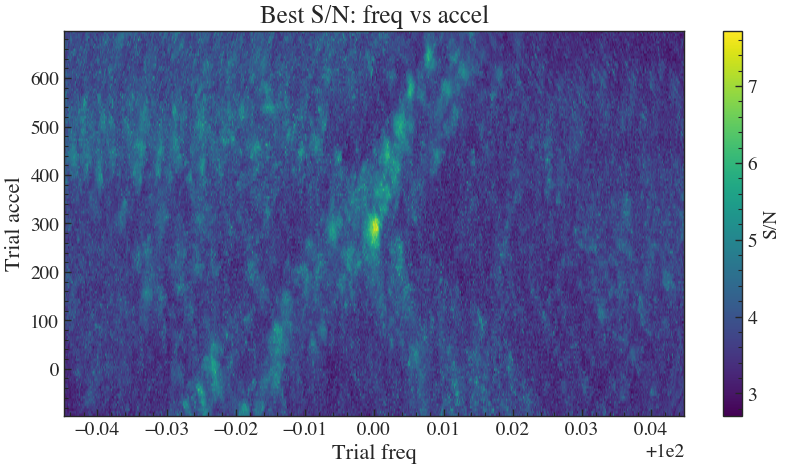

In [8]:
fig = pgram.plot_2d("freq", "accel", figsize=(10, 5))
plt.show()

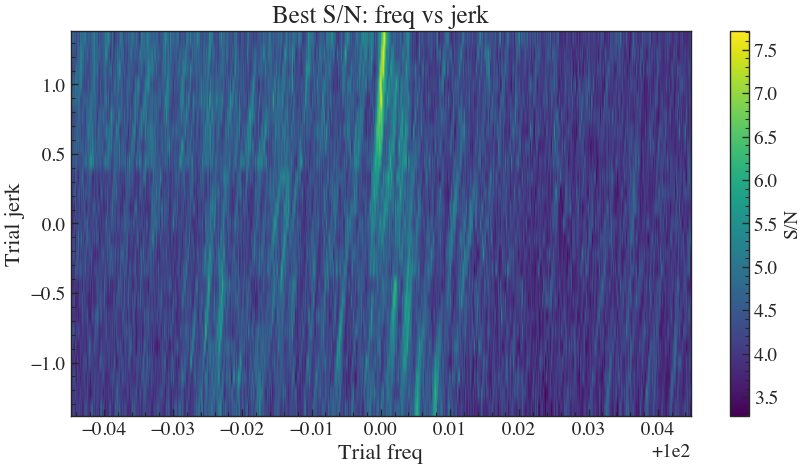

In [9]:
fig = pgram.plot_2d("freq", "jerk", figsize=(10, 5))
plt.show()

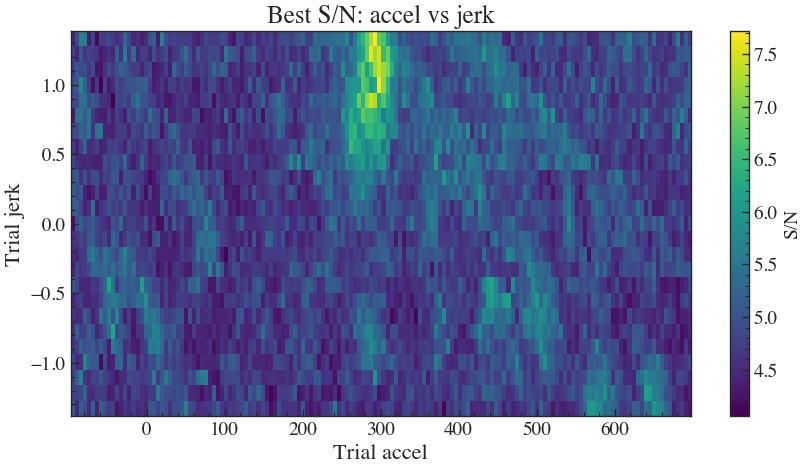

In [10]:
fig = pgram.plot_2d("accel", "jerk", figsize=(10, 5))
plt.show()

### FFT-SHIFT search

In [11]:
search_cfg = PulsarSearchConfig(
    nsamps=cfg.nsamps,
    tsamp=cfg.dt,
    nbins=nbins,
    eta=eta,
    param_limits=p.limits,
    bseg_brute=bseg_brute,
    ducy_max=0.2,
    wtsp=1.5,
    use_fourier=True,
)
ffa_plan, pgram = ffa_search(tim_data, search_cfg, quiet=False, show_progress=False)

[2026-02-18 18:32:14.346] [info] P-FFA [128, 1, 1, 6, 2, 33] -> [1, 25, 154, 771, 2, 33]
[2026-02-18 18:32:14.346] [info] FFA Memory Usage: 2.92 GB + 0.04 GB (coords)


In [12]:
true_values = {
    "jerk": cfg.mod_kwargs["jerk"],
    "accel": cfg.mod_kwargs["acc"],
    "freq": cfg.freq,
}
print(pgram.get_indices_summary(true_values=true_values))
print(pgram.get_summary())

True param indices: (21, 76, 385)
Best param indices: (np.int64(24), np.int64(75), np.int64(389), np.int64(5))
Best S/N: 8.00
Best Period: 0.00999995348311937
Best jerk: 1.3846153846153848
Best accel: 292.20671256774193
Best freq: 100.00046517097013
Best width: 9


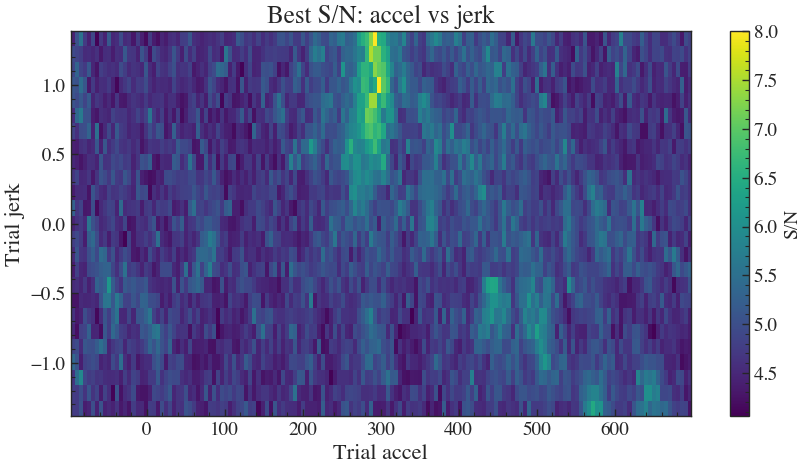

In [13]:
fig = pgram.plot_2d("accel", "jerk", figsize=(10, 5))
plt.show()